# Visualization

Visualizing data is important in data exploration because it can revel relationships that descriptive statistics do not. A classic example of this is Anscombe's quartet.  Anscombe's was an English statistician that created four data sets that have nearly identical descriptive statistics but appear very different when graphed. This example highlights how visualizations can help to identify correlations, patterns, and outlilers.  Another reason for visualizing data is that lots of data is easier for humans to understand visually. Think of the difference between a table depicting values over time for multiple countries versus that same information encoded in a line chart with time on the x axis and value on the y axis. Trends and differences between groups are much easier to identify in the visualization.

In [1]:
import pandas as pd
import numpy as np
import altair as alt
from vega_datasets import data
import json

Visualization Library

I am using the Altair library. Altair is a declarative visualization library for Python. It is based on Vega and Vega-Lite, which are visualization tools that can describe visual appearance and interactive behavior of a visualization in a JSON format. The source is available here: https://github.com/altair-viz/altair.

I selected Altair because it is relatively easy to use and has some neat map examples in their example gallery. Altair will also display maps in Jupyter notebooks. Matplotlib and seaborn don’t seem to offer easy ways to make map visualizations. One drawback of using Altair to make maps is that it does not seem to support interactive map visualizations at this time.

In [3]:
# Read WDI data into a pandas dataframe
wdi_df = pd.read_csv('WDIData.csv')

# There are region names included in the country column and I only want to look at countries
# Using the WDICountry.csv to get a list of countries only
wdi_country_df = pd.read_csv('WDICountry.csv')
# getting list of only countries and not regions
country_only = wdi_country_df.dropna(subset=['Region'])
country_only = country_only['Table Name']
#print(country_only)
# filtering out regions
wdi_df = wdi_df.loc[wdi_df['Country Name'].isin(country_only)]

In [ ]:
#looking at a table filled with lots of data 
#wdi_df

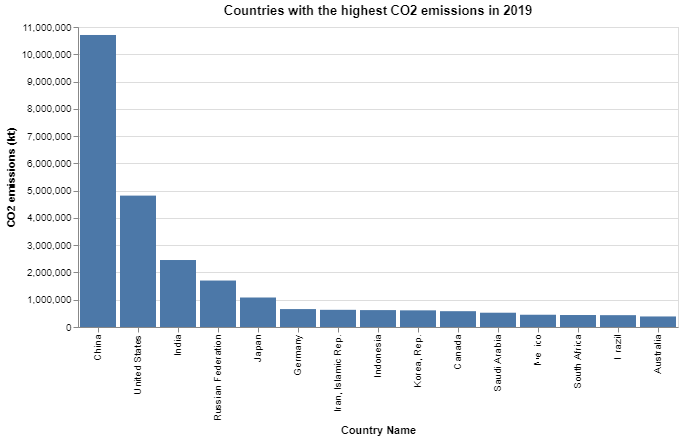

In [11]:
# making sense of some of the data with a visualization
#bar chart

source = wdi_df[wdi_df['Indicator Name'] =='CO2 emissions (kt)'] #selecting one indicator
source = source[['Country Name', '2019']] #getting only country name the CO2 emmision for the year 2019
source = source.nlargest(15, '2019') #getting the top 15 highest in 2019

alt.Chart(source).mark_bar().encode(
    x = alt.X('Country Name:N', sort='-y'),
    y = alt.Y('2019:Q', title='CO2 emissions (kt)'),
).properties(width=600, height=300, title='Countries with the highest CO2 emissions in 2019')


This bar chart is an example of a basic visualization. I think this is considered basic because it is relatively easy to create and interpret. The CO2 emissions of each country are encoded using y axis position and length of bar and the country is encoded using x axis position.

The expressiveness of a visualization is what information it conveys to the user. This visualization expresses the 15 countries with highest CO2 emissions in 2019 and shows the user what the emissions were for each country.

The effectiveness of a visualization depends on its purpose. This visualization would be effective for showing which countries emit the most CO2. This visualization would not be effective if I tried to use it to convey the exact CO2 emissions of Australia in 2019.

From J. Mackinlay's 1986 paper titled 'Automating the Design of Graphical Presentations of Relational Information'

Effective encodings for quantitative variables are position, length, and angel.

Effective encodings for ordinal variables are position, density, color saturation.

Effective encodings for ordinal variables are position, color hue, and texture


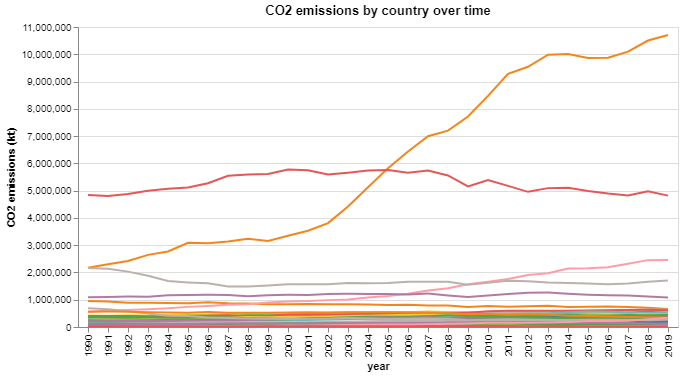

In [12]:
#lets look at a line chart

source = wdi_df[wdi_df['Indicator Name'] =='CO2 emissions (kt)']
#country_list = ['United States', 'Canada', 'Mexico']
#source = source.loc[source['Country Name'].isin(country_list)] # filter by country name

years_in_data = ['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968','1969', '1970', '1971', '1972', '1973', '1974', '1975', 
                '1976', '1977','1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986','1987', '1988', '1989', '1990', '1991', '1992', 
                '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004','2005', '2006', '2007', '2008', '2009', 
                '2010', '2011', '2012', '2013','2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']

alt.Chart(source).transform_fold(
    years_in_data[30:-2], # It turns out that for CO2 emissions there is only data from 1990-2019
    as_ = ['year', 'CO2 emissions (kt)']
).mark_line().encode(
    alt.X('year:N'),
    alt.Y('CO2 emissions (kt):Q'),
    alt.Color('Country Name:N', legend=None),
    tooltip='Country Name'
).properties(width=600, height=300, title='CO2 emissions by country over time').interactive()


This line chart is an example of a sligntly more advanced visualization. I think this is considered more advanced because it is harder to create and interpret. The user needs to use the interactive features to access all the information in the chart. The CO2 emissions of each country are encoded using y axis position and time is encoded using x axis position. The country is encoded using color and can be seen with a mouseover.

The expressiveness of a visualization is what information it conveys to the user. This visualization expresses individual countries CO2 emissions over time. 

The effectiveness of a visualization depends on its purpose. This visualization would be effective for showing trends in CO2 emissions over time. This visualization would not be effective if was used use it to convey the per capita CO2 emissions of a country over time.

Note: The Altair data transformation used above, .transform_fold, is a way to convert wide-form data to long-form data without any preprocessing.

In [6]:
#make a functon that returns a new df from a list of indicatior values and a year as string
def get_ind_df(df, indi_list, year):
    new_df = df[['Country Name','Indicator Name',year]]
    d= {'Country Name': new_df['Country Name'].unique()}
    output_df= pd.DataFrame(data=d)
    for indi in indi_list:
        temp_df= new_df[new_df['Indicator Name']== indi]
        temp_df = temp_df.rename(columns={ year : indi +' '+ year})
        temp_df= temp_df[['Country Name', indi +' '+ year]]
        output_df = output_df.merge(temp_df, how='outer', on='Country Name' )
    return output_df

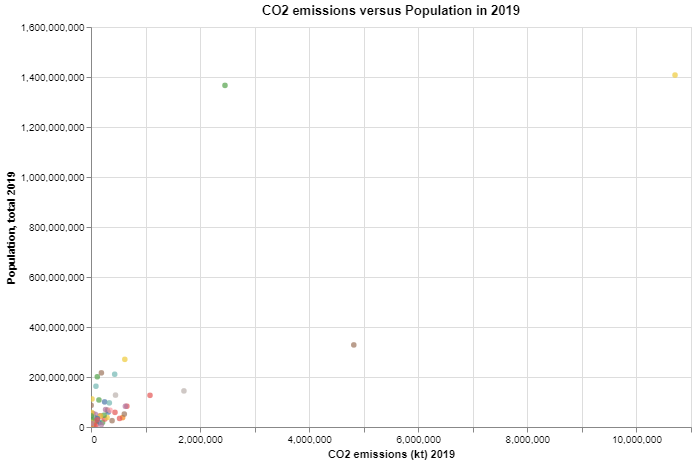

In [13]:
indi_list = ['CO2 emissions (kt)', 'CO2 emissions (metric tons per capita)','Population, total','GDP (current US$)']

source= get_ind_df(wdi_df, indi_list, '2019')

alt.Chart(source).mark_circle().encode(
    x = alt.X('CO2 emissions (kt) 2019'),
    y = alt.Y('Population, total 2019'),
    color = alt.Color('Country Name:N', legend=None),
    tooltip='Country Name'
).properties(width=600, height=400, title='CO2 emissions versus Population in 2019' ).interactive()


In [9]:
#this file is from https://wits.worldbank.org/wits/wits/witshelp/content/codes/country_codes.htm
country_id = pd.read_csv('country_id.csv') 
#country_id
id_dict = dict(zip(country_id['Country Name'], country_id['id']))
#print(id_dict)


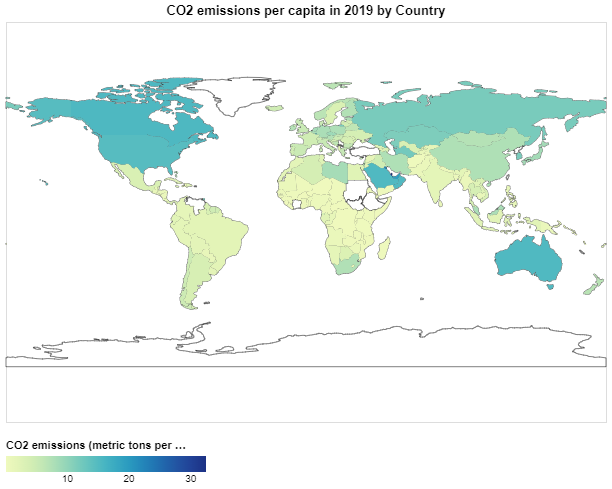

In [14]:

countries = alt.topo_feature(data.world_110m.url, 'countries')

source = wdi_df[wdi_df['Indicator Name'] =='CO2 emissions (metric tons per capita)']
source = source[['Country Name', '2019']] #getting the CO2 emmision for the year 2019
source['id'] = source['Country Name'].map(id_dict)
#print(source.head())

base = alt.Chart(countries).mark_geoshape(fill='white', stroke='black', strokeWidth=0.5)

chart= alt.Chart(countries).mark_geoshape().encode(
    color=alt.Color('2019:Q', legend=alt.Legend(title="CO2 emissions (metric tons per capita)", orient="bottom"))
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(source, 'id', ['2019'])
).project(
    type="equirectangular"
).properties(
    width=600,
    height=400,
    title='CO2 emissions per capita in 2019 by Country'
)
base + chart


This choropleth map is an example of an advanced visualization. I think this is considered advanced because it is more difficult to create and interpret. The per capita CO2 emissions of each country are encoded using color and the country is encoded using map position. 

The expressiveness of a visualization is what information it conveys to the user. This visualization expresses per capita CO2 emissions of countries in 2019. 

The effectiveness of a visualization depends on its purpose. This visualization would be effective for showing the relative difference in per capita CO2 emissions around the world in 2019. This visualization would not be effective to convey the exact per capita CO2 emissions of a particular country in 2019. One drawback of using color is that it's hard to read exact values from the map. Another drawback is that larger regions appear more emphasised then smaller ones.


In [ ]:
#Dependencies
%load_ext watermark
%watermark
%watermark --iversions

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Last updated: 2022-09-26T16:21:42.416143-04:00

Python implementation: CPython
Python version       : 3.10.4
IPython version      : 8.4.0

Compiler    : MSC v.1929 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 140 Stepping 2, GenuineIntel
CPU cores   : 8
Architecture: 64bit

json  : 2.0.9
pandas: 1.4.2
sys   : 3.10.4 (tags/v3.10.4:9d38120, Mar 23 2022, 23:13:41) [MSC v.1929 64 bit (AMD64)]
numpy : 1.22.3
altair: 4.2.0

